In [47]:
import os
import glob 
import json
import pandas as pd
import numpy as np
import nibabel as nib
from natsort import natsorted
from nltools.data import Brain_Data, Design_Matrix
from nltools.file_reader import onsets_to_dm
from nltools.mask import expand_mask
from nltools.stats import align, regress, zscore

In [2]:
# I/O
all_data = []
target_run, train_run = 1, 7
sub_list = ["01", "02", "03", "04", "06", "10", "14", "15", "16", "17", "18", "19", "20"]
roi = 2030
event_file = "/home/exp-psy/Desktop/study_face_tracks/derivatives/reference_face-tracks/studyf_run-01_face-orientation.csv"
deriv_dir = "/home/exp-psy/Desktop/study_face_tracks/derivatives/"
out_dir = os.path.join(deriv_dir, "hyperalignmend")
print("output folder:\t", out_dir)

output folder:	 /home/exp-psy/Desktop/study_face_tracks/derivatives/hyperalignmend


In [3]:
# nuis. regressors to keep
conf_keep_list = [
    "trans_x", "trans_y", "trans_z", 
    "rot_x", "rot_y", "rot_z", 
    "csf", "white_matter", 
    "a_comp_cor_00", "a_comp_cor_01", 
    "a_comp_cor_02", "a_comp_cor_03", 
    "a_comp_cor_04"
]

In [4]:
# store output
if not os.path.exists(out_dir):
    os.makedirs(out_dir, exist_ok=True)

## data descr. volumes per run:
- run-1: 451
- run-2: 441
- run-3: 438
- run-4: 488
- run-5: 462 
- run-6: 439
- run-7: 542
- run-8: 338

In [5]:
if target_run == 1:
    train_volumes = 451
elif target_run == 2:
    train_volumes = 441
elif target_run == 3:
    train_volumes = 438
elif target_run == 4:
    train_volumes = 488
elif target_run == 5:
    train_volumes = 462
elif target_run == 6:
    train_volumes = 439
elif target_run == 8:
    train_volumes = 338

In [6]:
def slicer(in_path, train_volumes):
    img = nib.load(in_path)
    img_data = img.get_fdata()
    sliced_data = img_data[..., :train_volumes]
    return nib.Nifti1Image(sliced_data, affine=img.affine, header=img.header)

## load training data

In [8]:
for sub in sub_list:
    # paths
    aparc_fpath = os.path.join(
        "/home", 
        "exp-psy", 
        "Desktop", 
        "study_face_tracks", 
        "derivatives", 
        "fmriprep_native",
        f"sub-{sub}", 
        "ses-movie", 
        "func", 
        f"sub-{sub}_ses-movie_task-movie_run-{train_run}_space-T1w_desc-aparcaseg_dseg.nii.gz"
    )
    print(f"extracting data from subject: {sub} for roi: {roi}")

    # load mask
    mask_data = Brain_Data(aparc_fpath)
    mask_rois = expand_mask(mask_data)
    roi_mask = mask_rois[roi]

    func_f = os.path.join(
        "/home", 
        "exp-psy", 
        "Desktop", 
        "study_face_tracks", 
        "derivatives", 
        "fmriprep_native",
        f"sub-{sub}", 
        "ses-movie", 
        "func", 
        f"sub-{sub}_ses-movie_task-movie_run-{target_run}_space-T1w_desc-preproc_bold.nii.gz"
        )
    data = Brain_Data(slicer(func_f, train_volumes))
    all_data.append(data.apply_mask(roi_mask))

extracting data from subject: 01 for roi: 2030


/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/image/resampling.py:591: UserWarning: Casting data from int16 to float32
  warnings.warn(f"Casting data from {data.dtype.name} to {aux}")
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/masking.py:974: UserWarning: Data ar

extracting data from subject: 02 for roi: 2030


/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine tha

extracting data from subject: 03 for roi: 2030


/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine tha

extracting data from subject: 04 for roi: 2030


/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine tha

extracting data from subject: 06 for roi: 2030


/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine tha

extracting data from subject: 10 for roi: 2030


/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine tha

extracting data from subject: 14 for roi: 2030


/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine tha

extracting data from subject: 15 for roi: 2030


/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine tha

extracting data from subject: 16 for roi: 2030


/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine tha

extracting data from subject: 17 for roi: 2030


/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine tha

extracting data from subject: 18 for roi: 2030


/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine tha

extracting data from subject: 19 for roi: 2030


/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine tha

extracting data from subject: 20 for roi: 2030


/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


## start hyperalignment

In [9]:
hyperalign = align(all_data, method="procrustes")

In [10]:
sub = "01"

In [11]:
func_f = os.path.join(
    "/home", 
    "exp-psy", 
    "Desktop", 
    "study_face_tracks", 
    "derivatives", 
    "fmriprep_native",
    f"sub-{sub}", 
    "ses-movie", 
    "func", 
    f"sub-{sub}_ses-movie_task-movie_run-{target_run}_space-T1w_desc-preproc_bold.nii.gz"
    )

In [12]:
aparc_fpath = os.path.join(
    "/home", 
    "exp-psy", 
    "Desktop", 
    "study_face_tracks", 
    "derivatives", 
    "fmriprep_native",
    f"sub-{sub}", 
    "ses-movie", 
    "func", 
    f"sub-{sub}_ses-movie_task-movie_run-{target_run}_space-T1w_desc-aparcaseg_dseg.nii.gz"
)
print(f"extracting data from subject: {sub} for roi: {roi}")

# load mask
mask_data = Brain_Data(aparc_fpath)
mask_rois = expand_mask(mask_data)
roi_mask = mask_rois[roi]

/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/image/resampling.py:591: UserWarning: Casting data from int16 to float32
  warnings.warn(f"Casting data from {data.dtype.name} to {aux}")


extracting data from subject: 01 for roi: 2030


In [13]:
align_data = Brain_Data(func_f, mask=roi_mask.to_nifti())

/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/exp-psy/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


In [14]:
aligned_sub_hyperalignment = align_data.align(hyperalign["common_model"], method="procrustes")

In [53]:
smoothed = aligned_sub_hyperalignment["transformed"].smooth(fwhm=3)

In [16]:
out_dir_beta = os.path.join(deriv_dir, "hyperalignmend", f"sub-{sub}")
print("output folder:\t", out_dir_beta)
if not os.path.exists(out_dir):
    os.makedirs(out_dir, exist_ok=True)

output folder:	 /home/exp-psy/Desktop/study_face_tracks/derivatives/hyperalignmend/sub-01


In [17]:
events = pd.read_csv(event_file, sep=",")
events = events.rename(
    columns={"onset": "Onset", "duration": "Duration", "trial_type": "Stim"}
)
events = events[["Onset", "Duration", "Stim"]]
events = events[events["Stim"].str.count("frontal|right|left") == 1]
events

,Onset,Duration,Stim
0,133,2,frontal-0
1,135,5,right-1
2,162,4,right-2
3,166,2,frontal-1
4,244,10,left-1
...,...,...,...
86,802,5,frontal-32
96,880,3,frontal-34
98,887,5,frontal-35
99,892,3,right-29


In [44]:
def make_motion_covariates(mc, tr):
    z_mc = zscore(mc)
    all_mc = pd.concat([z_mc, z_mc**2, z_mc.diff(), z_mc.diff()**2], axis=1)
    all_mc.fillna(value=0, inplace=True)
    return Design_Matrix(all_mc, sampling_freq=1/tr)

In [45]:
conf_file = f"/home/exp-psy/Desktop/study_face_tracks/derivatives/fmriprep_native/sub-{sub}/ses-movie/func/sub-{sub}_ses-movie_task-movie_run-{target_run}_desc-confounds_timeseries.tsv"
confounds = pd.read_csv(conf_file, sep="\t")[conf_keep_list]
confounds.head()

,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z,csf,white_matter,a_comp_cor_00,a_comp_cor_01,a_comp_cor_02,a_comp_cor_03,a_comp_cor_04
0,0.024521,-0.045345,0.103563,-0.001451,0.000544,0.001098,436.126500,337.476622,0.043011,-0.043472,0.013747,-0.034376,0.003055
1,0.019140,-0.070998,0.071514,-0.000342,0.000135,0.000287,433.195484,337.147383,-0.009979,-0.064786,0.024376,-0.027180,-0.043609
2,0.010622,-0.036515,0.100095,-0.001123,0.000309,0.000587,440.486088,338.088050,-0.058388,0.037546,0.000301,-0.050623,0.002717
3,0.007693,-0.089453,0.046631,-0.000570,0.000431,0.000379,437.137979,339.262798,0.094601,-0.020738,-0.063570,-0.054669,0.054112
4,0.006940,0.023665,0.067871,-0.001168,0.000155,0.000791,438.807934,337.887147,-0.057194,0.005232,-0.016211,-0.010800,0.039982


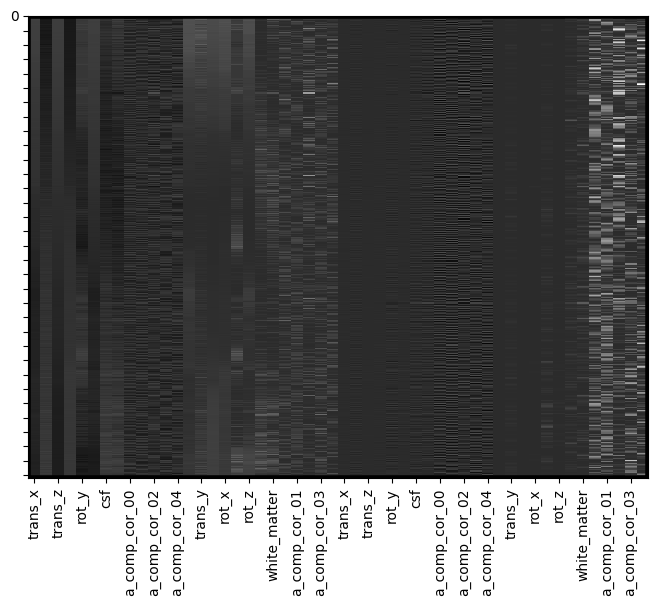

In [50]:
cov_dm = make_motion_covariates(confounds, TR)
cov_dm.heatmap()

In [19]:
json_file = f"/home/exp-psy/Desktop/study_face_tracks/derivatives/fmriprep_native/sub-{sub}/ses-movie/func/sub-{sub}_ses-movie_task-movie_run-{target_run}_space-T1w_desc-preproc_bold.json"
with open(json_file, "r") as f:
    metadata = json.load(f)
TR = metadata.get('RepetitionTime', None)
print(f"TR: {TR}")

TR: 2.00000061


In [38]:
for i, row in events.iterrows():
    lss_df = events.copy()

    lss_df["Stim"] = lss_df["Stim"].apply(lambda x: x if x == row["Stim"] else "other")
    dm = onsets_to_dm(lss_df, 1/TR, train_volumes)
    dm_conv = dm.convolve()
    dm_conv_filt = dm_conv.add_dct_basis(duration=128)
    dm_conv_filt_poly = dm_conv_filt.add_poly(order=2, include_lower=True)

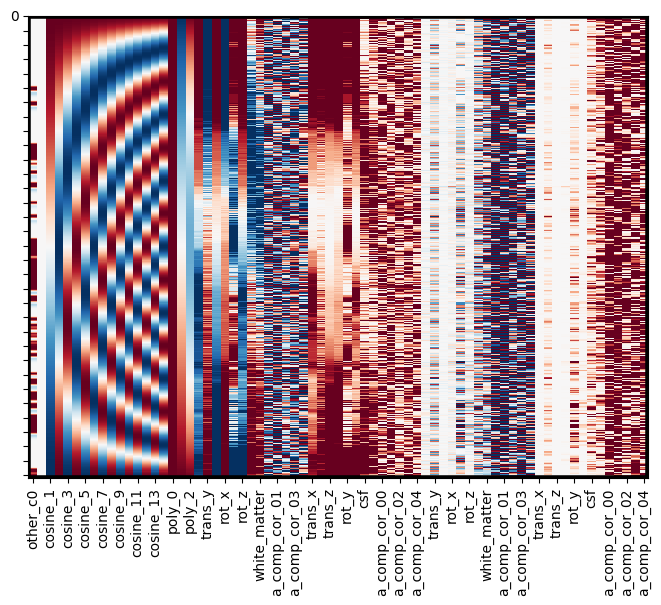

In [51]:
dm_conv_filt_poly_cov = pd.concat([dm_conv_filt_poly, cov_dm], axis=1)
dm_conv_filt_poly_cov.heatmap(cmap='RdBu_r', vmin=-1,vmax=1)

In [56]:
smoothed.X = dm_conv_filt_poly_cov
stats = smoothed.regress()

In [57]:
stats['beta'][0].iplot()

ImportError: ipywidgets>=5.2.2 is required for interactive plotting. Please install this package manually or install nltools with optional arguments: pip install 'nltools[interactive_plots]'

In [58]:
%

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.11/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai